<a href="https://colab.research.google.com/github/JacobTumak/cap-comp215/blob/main/labs/lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 4 (Graphs)
-------------------------
#### Name: Jacob Tumak
#### Date:

This lab exercise is an introduction to Graphs and Graph Analysis using [NetworkX](https://networkx.org/documentation/stable/).

**New Python concepts**:
  * **NetworkX** is an open-source package.  It provides a `Graph` object to represent a graph.
  * Built-in `random` module provides algorithms for generating pseudo-random sequences
  * [Generator expression](https://towardsdatascience.com/understanding-generator-expressions-in-python-fe0c4534619) - similar to a list comprehension, but faster and using much less memory!

**Credits**:
    Code examples based on [Think Complexity, 2nd edition](https://thinkcomplex.com).
    Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

As usual, the first code cell simply imports all the modules we'll be using...

In [1]:
import math
import random
import statistics
from timeit import timeit

import matplotlib.pyplot as plt
import networkx as nx

## Directed graph

The first example is a directed graph that represents a social network with four nodes.

In [2]:
social_network = nx.DiGraph()
social_network.add_node('John')
social_network.add_node('Alice')
social_network.add_node('Bob')
social_network.add_node('Chuck')
list(social_network.nodes())

['John', 'Alice', 'Bob', 'Chuck']

Add some edges between nodes to represent the "Follows" relationship (e.g., Alice "follows" Bob)

In [3]:
social_network.add_edge('Alice', 'Bob')
social_network.add_edge('Alice', 'Chuck')
social_network.add_edge('Bob', 'Alice')
social_network.add_edge('Bob', 'Chuck')
social_network.add_edge('John','Bob')
social_network.add_edge('John','Alice')
list(social_network.edges())

[('John', 'Bob'),
 ('John', 'Alice'),
 ('Alice', 'Bob'),
 ('Alice', 'Chuck'),
 ('Bob', 'Alice'),
 ('Bob', 'Chuck')]

And here's how to draw the graph.
Modify the draw parameters to see how to customize the display [[docs](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html)]

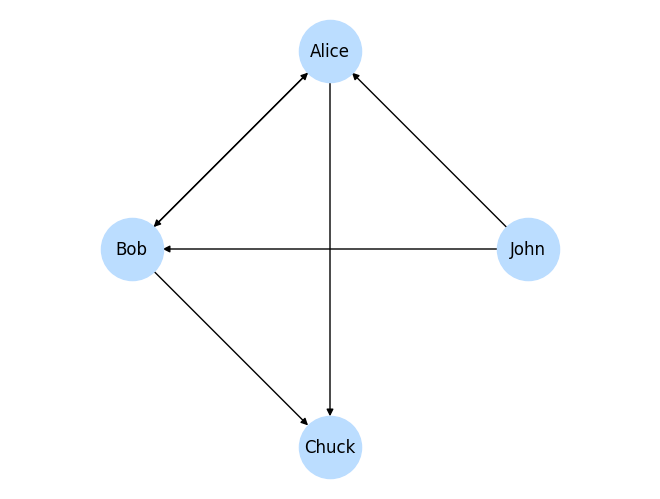

In [4]:
nx.draw_circular(social_network,
                 node_color='#bbddff',
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()

### Exercise 1:
Add at least 2 additional nodes (users) and a few more edges (follows relations) and re-draw the graph.
Don't modify the code above, instead, re-create and draw a new graph with the extra nodes.

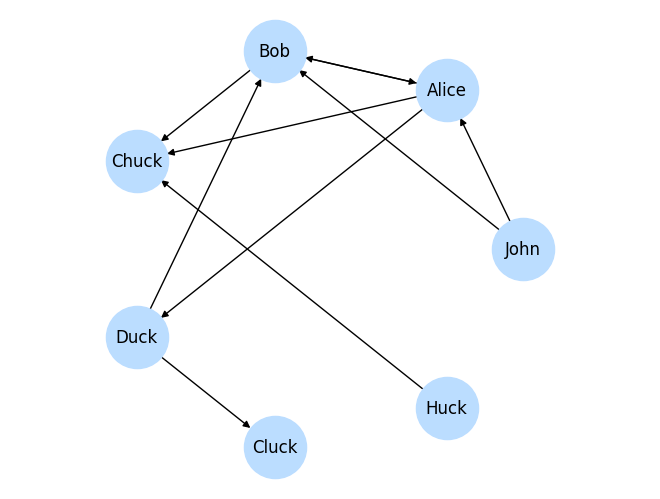

In [5]:
social_network.add_node('Duck')
social_network.add_node('Cluck')
social_network.add_node('Huck')
social_network.add_edge('Alice', 'Duck')
social_network.add_edge('Duck', 'Bob')
social_network.add_edge('Duck', 'Cluck')
social_network.add_edge('Huck', 'Chuck')

nx.draw_circular(social_network,
                 node_color='#bbddff',
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`locations` is a dictionary that maps from each city to a spatial coordinate and
`drive_times` is a dictionary that maps a pair of cities to the driving time in minutes between them.

In [6]:
locations = dict(NorthVan=(5, 5),
                 Burnaby=(7, 1),
                 Vancouver=(0, 0),  # position Vancouver at the centre of the universe, of course ;-)
                 Richmond=(-1, -4))

drive_times = {('NorthVan', 'Burnaby'): 20,
               ('NorthVan', 'Vancouver'): 35,
               ('Burnaby', 'Vancouver'): 15,
               ('Vancouver', 'Richmond'): 25}

f"From North Van at {locations['NorthVan']} the drive time to Burnaby is {drive_times[('NorthVan', 'Burnaby')]} minutes."

'From North Van at (5, 5) the drive time to Burnaby is 20 minutes.'

Now we can use the keys in `locations` to add nodes to a graph,
and the `drive_times` keys to define the edges between them
Notice how when a `dict` object is treated as a sequence (rather than a mapping), it is a sequence of it's **keys**.

In [7]:
cities = nx.Graph()
cities.add_nodes_from(locations)
cities.add_edges_from(drive_times)

cities.nodes(), cities.edges()

(NodeView(('NorthVan', 'Burnaby', 'Vancouver', 'Richmond')),
 EdgeView([('NorthVan', 'Burnaby'), ('NorthVan', 'Vancouver'), ('Burnaby', 'Vancouver'), ('Vancouver', 'Richmond')]))

And we can draw the graph using `locations` to arrange nodes spatially and with `drive_times` to label the edges.

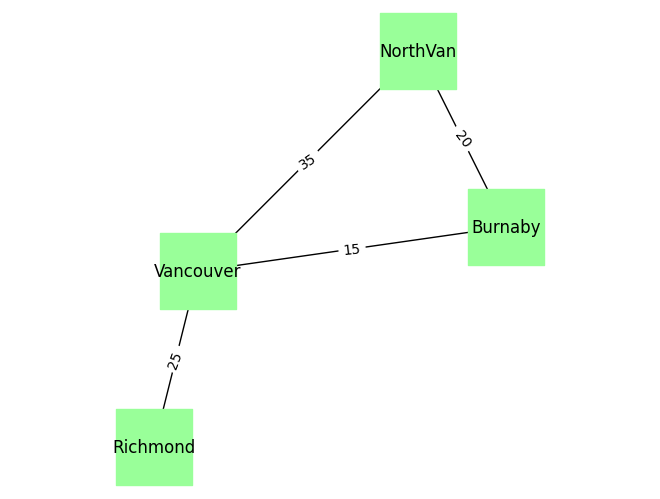

In [8]:
nx.draw(cities, locations,
        node_color='#99ff99',
        node_shape='s',
        node_size=3000,
        with_labels=True)

nx.draw_networkx_edge_labels(cities, locations,
                             edge_labels=drive_times)

plt.axis('equal')
plt.show()

### Exercise 2
Add at least 2 additional nodes (cities) and edges (drive times) and re-draw the graph.
Improve the data in your version of the graph by looking up estimated / average drive times.
Don't modify the code above - re-develop a complete solution with your additions / changes in the code block below.

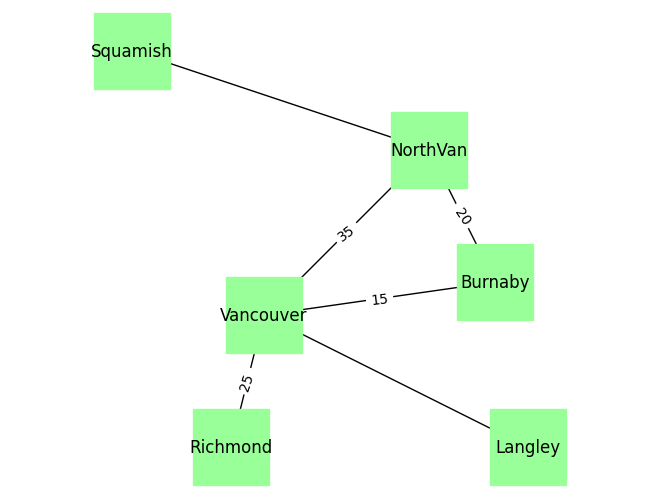

In [9]:
add_loc = dict(Squamish=(-4, 8),
               Langley=(8,-4))
locations.update(add_loc)
add_d_times = {('NorthVan', 'Squamish'): 40,
               ('Langley', 'Vancouver'): 60}

cities.add_nodes_from(locations)
cities.add_edges_from(add_d_times)

nx.draw(cities, locations,
        node_color='#99ff99',
        node_shape='s',
        node_size=3000,
        with_labels=True)

nx.draw_networkx_edge_labels(cities, locations,
                             edge_labels=drive_times)

plt.axis('equal')
plt.show()

## Complete graph

To make a complete graph, we need an edge between every distinct pair of nodes.
The algorithm below creates the complete set of distinct, undirected pairs from a list of input objects.
**Be sure you understand how this algorithm works!**  If you need to re-write it as a loop and replace zip with index logic, do it.

In [10]:
def all_pairs(objects):
    """ Return a generator with the complete set of distinct object pairs, as 2-tuples, from the given iterable of objects """
    return ((a, b) for i in range(1, len(objects)) for a,b in zip(objects, objects[i:]))

list( all_pairs(('w', 'x', 'y', 'z')) )

[('w', 'x'), ('x', 'y'), ('y', 'z'), ('w', 'y'), ('x', 'z'), ('w', 'z')]

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between each distinct pair of nodes.

In [11]:
def make_complete_graph(n):
    """ Return a "complete" Graph with n nodes labeled 0 .. n-1 """
    graph = nx.Graph()
    labels = range(n)
    graph.add_nodes_from(labels)
    graph.add_edges_from(all_pairs(labels))
    return graph

In [12]:
complete = make_complete_graph(10)
f'Complete Graph has {complete.number_of_nodes()} nodes and {complete.number_of_edges()} edges'

'Complete Graph has 10 nodes and 45 edges'

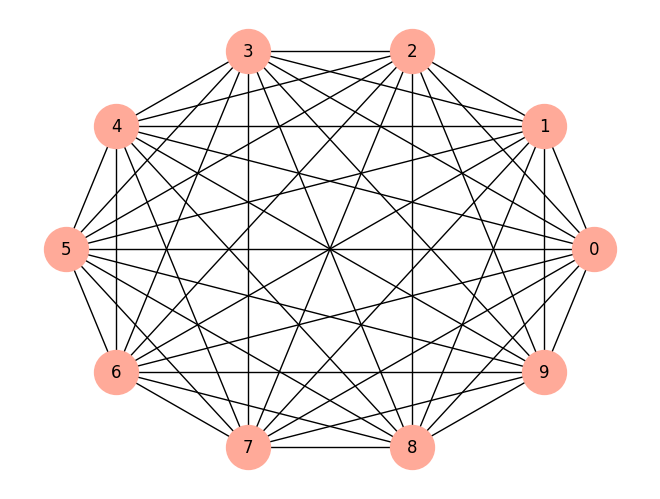

In [13]:
nx.draw_circular(complete,
                 node_color='#ffaa99',
                 node_size=1000,
                 with_labels=True)
plt.show()

The `neighbors` method of a Graph object returns the nodes with an edge a given node.  In a complete graph, that is all other nodes!

In [14]:
node = 3
f'Neighbours of node {node}:  {list(complete.neighbors(0))}'

'Neighbours of node 3:  [1, 2, 3, 4, 5, 6, 7, 8, 9]'

### Exercise 3
Make another compelete graph with a different number of nodes (again, develop your own graph and diagram below).
Verify that each node has the expected number of `neighbors`

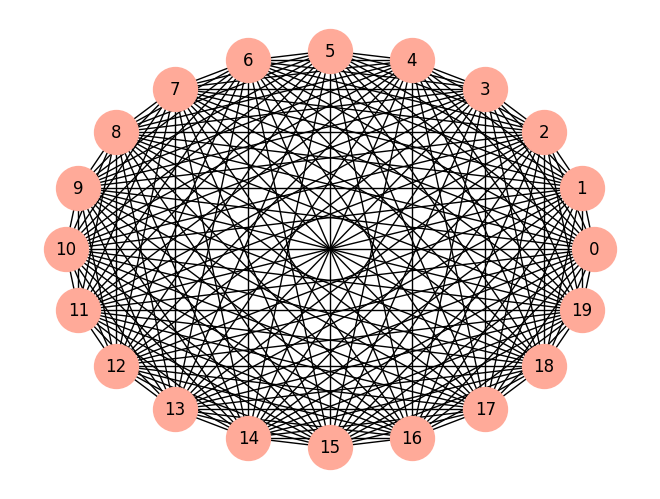

In [15]:
# Solution for Ex. 3 here...
graph_n = make_complete_graph(20)
nx.draw_circular(graph_n,
                 node_color='#ffaa99',
                 node_size=1000,
                 with_labels=True)
plt.show()

In [16]:
len(list(graph_n.neighbors(0)))
graph_n.number_of_edges()

190

## Random Numbers
This is a big topic we will return to several times in Comp215.

In the next section we need to randomize the connections (edges) in a graph.
Here we'll develop a small function to generate the random sequence for that and explore some of its properties.

We `seed` Python's built-in random number generator so we get the same sequence each time (to facilitate debugging and comprehension!)

In [17]:
random.seed(6) # Comment this out to run randomized experiments

Repeated calls to the function below will generate a random sequence of True/False values.
It's easiest to think of this as a simulated "coin toss", where True is "heads" and False is "tails".
But this coin can be "biased" - input $p$ specifies the probability of throwing "heads" and it need not be 50%!

In [18]:
def coin_toss(p):
    """ Simulate flipping a biased "coin", where the probability of 'heads' is p.  Return True iff 'heads', False otherwise """
    return random.random() < p

### Exercise 4
Use a list comprehension to generate a random sequence of 100 "fair" `coin_toss`es  (p = 0.5)
Count the number "heads" (True) and "tails" (False) in the list (hint:  `sum(1 for toss in .... if ....)
Rerun the experiment several times to gain a deeper understanding of what this function does.
Experiment with different values of $p$.  What is the meaning of $p$ in this context?

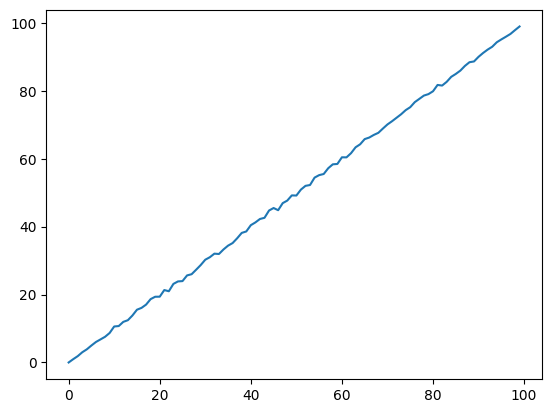

In [19]:
# Solution for Ex. 4 here...
meta_y_vals = []
for p in range(100):
  y_vals = []
  for i in range(100):
    random_tosses = [coin_toss(p/100) for toss in range(100)]
    y_vals.append(sum(1 for toss in random_tosses if toss))
  meta_y_vals.append(sum(y_vals)/100)

plt.plot(range(100), meta_y_vals)
plt.show()

## Random graphs
from the textbook...
> One of the more interesting \[random graphs\] is the Erdős-Rényi model, studied by Paul Erdős and Alfréd Rényi in the 1960s.

> An Erdős-Rényi graph (ER graph) is characterized by two parameters: $n$ is the number of nodes and $p$ is the probability that there is an edge between any two nodes.

> Erdős and Rényi studied the properties of these random graphs; one of their surprising results is the existence of abrupt changes in the properties of random graphs as random edges are added.

In the remainder of the lab we will work towards re-producing this computational experiment.

We start by making an ER graph where the probability of an edge between each pair of nodes is $p$.

`random_pairs` generates a random subset of all possible distinct pairs from a set of objects,
where each pair has a fixed probability, `p` of appearing in the subset.
Notice how the algorithm starts with `all_pairs`, and applies a **filter** operation to randomly filter some pairs out with probability $p$.
Again, if you have any trouble reading the generator expression here, please re-write it as a loop so you are 100% clear how it works.

In [20]:
def random_pairs(objects, p):
    """ Return a generator of random subset of distinct object pairs (2-tuples), each with a probability of `p` """
    return (pair for pair in all_pairs(objects) if coin_toss(p))  # "flip a coin" to determine whether a given pair is included.

# Run this cell several times to see different random subsets.  Change value of `p` to alter likely size of the result.
list( random_pairs(('w', 'x', 'y', 'z'), p=0.5) )

[('w', 'x')]

`make_random_graph` makes an ER Graph where the probability of an edge between each pair of nodes is `p`.

Again, you can run the 2nd code block below a few times to generate different random graphs.

In [21]:
def make_random_graph(n, p):
    """ Return an ER Graph with n nodes, where the probability of an edge between a pair of nodes in p """
    graph = nx.Graph()
    labels = range(n)
    graph.add_nodes_from(labels)
    graph.add_edges_from(random_pairs(labels, p))
    return graph

Random Graph has 10 nodes and 14 edges


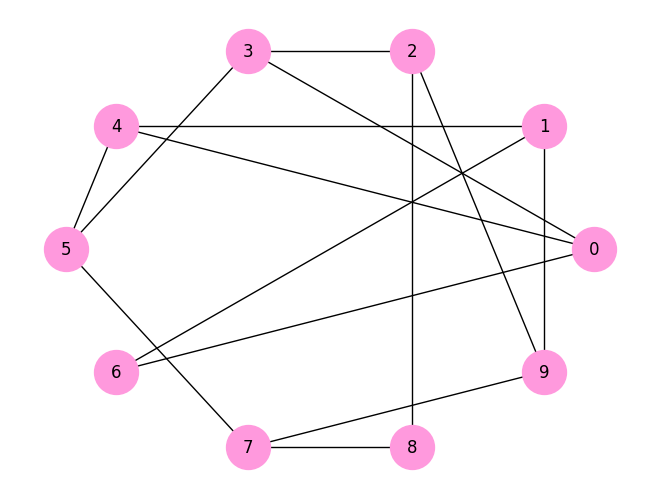

In [22]:
random_graph = make_random_graph(10, 0.3)
print(f'Random Graph has {random_graph.number_of_nodes()} nodes and {random_graph.number_of_edges()} edges')

nx.draw_circular(random_graph,
                 node_color='#ff99dd',
                 node_size=1000,
                 with_labels=True)
plt.show()

## Connectivity

To check whether a graph is "connected", we'll start by finding all nodes that can be reached, starting at a given node.
This algorithm uses a set to keep track of nodes we've already `seen` and a `stack` (list) to keep track of nodes we could reach from here.
Trace this algorithm for a node from the graph above, tracking the `seen` and `stack` collections so you really understand how it works.

In [23]:
def reachable_nodes(graph, start):
    """ return the set of nodes that are reachable from the given start node"""
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(graph.neighbors(node))
    return seen

In the complete graph, we can reach all nodes from any starting node, but that's not neccessarily true for a random graph...

In [24]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [25]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Now it's straight-forward to determine if the graph **is connected** or not.
Of course, a complete graphs is always connected, but a random graph may not be.

In [26]:
def is_connected(graph):
    """ Return True if the graph is connected, false otherwise. """
    start = next(iter(graph))   # grab the first node in the graph.  This statement will need some further explanation.
    reachable = reachable_nodes(graph, start)
    return len(reachable) == len(graph)

In [27]:
is_connected(complete)

True

In [28]:
is_connected(random_graph)

True

### Exercise 5
Use `timeit` to run an experiment that times the `reachable_nodes` algorithm.
Once you understand how `timeit` works, design a small experiment to time the `reachable_nodes` algorithm for a range of graph sizes (`n`)
*Optional*: plot the results of your experiment on a graph.

In [29]:
# Solution for Ex. 5 goes below... here's an example of how to use timeit:
n = 100
seconds = timeit(lambda: reachable_nodes( make_complete_graph(n),  0 ),  number=1)
f'Time to execute: {seconds} seconds'

'Time to execute: 0.04685436300000845 seconds'

## Likelihood of connectivity

We are finally ready to replicate Erdős and Rényi's computational experiment.
In this experiment, we estimate the likelihood that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the proportion of them that are connected.
Be sure you understand how this algorithm works.  Again, re-write it using loops if needed to understand what it does and how it works.

In [30]:
def proportion_connected(n, p, iters=100):
    """ Return the proportion of iters random ER Graphs (n, p) that are connected. """
    graphs = (make_random_graph(n, p) for i in range(iters))
    return statistics.mean( (1 if is_connected(graph) else 0 for graph in graphs) )

n = 30
p = 0.1
f'Likelihood that an ER graph (n={n}, p={p}) is connected: {proportion_connected(n, p)*100}%'

'Likelihood that an ER graph (n=30, p=0.1) is connected: 19.0%'

## Critical Value of $p$

Near a "critical value" of $p$, the likelihood of a random graph being connected rapidly changes from near 0 to near 1.
Erdős and Rényi predict the critical value should be:  $ln(n) / n$
For example...

In [31]:
n = 30
f'Erdős and Rényi predict the crictical value of p for graphs of size {n} = {math.log(n) / n:0.3f}'

'Erdős and Rényi predict the crictical value of p for graphs of size 30 = 0.113'

### Exercise 6
Experiment with `proportion_connected` at different values of $p$, to confirm (or refute) Erdős and Rényi's results.
Ideally, write a small piece of code to run the experiment over a range of $p$.
The goal of this experiment is to identify the "critical value" of $p$ for graphs of size $n$.

In [62]:
n = 30
proportion = {proportion_connected(n, p/10000): p/10000 for p in range(500, 3000)}

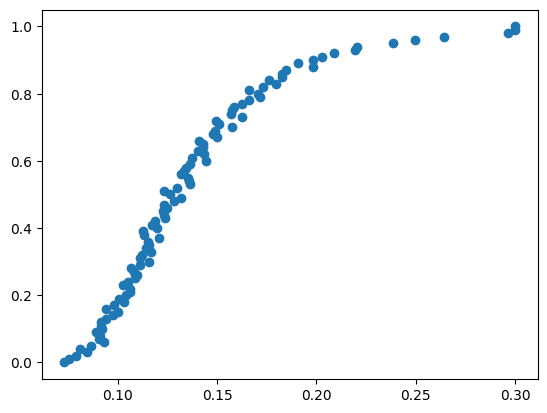

In [63]:
plt.scatter(proportion.values(), proportion.keys())

The graph above shows that the there is an inflection point between p(0.1) and p(0.15). This supports Erdős and Rényi's results.